In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [2]:
data =pd.read_csv('Downloads/bank-full.csv')

In [16]:
data.shape

(45211, 17)

In [3]:
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
data.replace(to_replace=["unknown"], value=0, inplace=True)

In [5]:
data.head(15)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,0,5,may,261,1,-1,0,0,no
1,44,technician,single,secondary,no,29,yes,no,0,5,may,151,1,-1,0,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,0,5,may,76,1,-1,0,0,no
3,47,blue-collar,married,0,no,1506,yes,no,0,5,may,92,1,-1,0,0,no
4,33,0,single,0,no,1,no,no,0,5,may,198,1,-1,0,0,no
5,35,management,married,tertiary,no,231,yes,no,0,5,may,139,1,-1,0,0,no
6,28,management,single,tertiary,no,447,yes,yes,0,5,may,217,1,-1,0,0,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,0,5,may,380,1,-1,0,0,no
8,58,retired,married,primary,no,121,yes,no,0,5,may,50,1,-1,0,0,no
9,43,technician,single,secondary,no,593,yes,no,0,5,may,55,1,-1,0,0,no


In [6]:
d = {'yes': 1, 'no': 0}
data['housing'] = data['housing'].map(d)
data['loan']=data['loan'].map(d)
data['Target']=data['Target'].map(d)
data['default'] = data['default'].map(d)

In [7]:
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,0,2143,1,0,0,5,may,261,1,-1,0,0,0
1,44,technician,single,secondary,0,29,1,0,0,5,may,151,1,-1,0,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,0,5,may,76,1,-1,0,0,0
3,47,blue-collar,married,0,0,1506,1,0,0,5,may,92,1,-1,0,0,0
4,33,0,single,0,0,1,0,0,0,5,may,198,1,-1,0,0,0


In [8]:
a = {'married':1,'single':0}
b = {'tertiary':1 , 'secondary':0}
data['marital']=data['marital'].map(a)
data['education']=data['education'].map(b)

In [9]:
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,1.0,1.0,0,2143,1,0,0,5,may,261,1,-1,0,0,0
1,44,technician,0.0,0.0,0,29,1,0,0,5,may,151,1,-1,0,0,0
2,33,entrepreneur,1.0,0.0,0,2,1,1,0,5,may,76,1,-1,0,0,0
3,47,blue-collar,1.0,NaN,0,1506,1,0,0,5,may,92,1,-1,0,0,0
4,33,0,0.0,NaN,0,1,0,0,0,5,may,198,1,-1,0,0,0


In [10]:
data.tail(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45191,75,retired,NaN,1.0,0,3810,1,0,cellular,16,nov,262,1,183,1,failure,1
45192,29,management,0.0,1.0,0,765,0,0,cellular,16,nov,238,1,-1,0,0,1
45193,28,self-employed,0.0,1.0,0,159,0,0,cellular,16,nov,449,2,33,4,success,1
45194,59,management,1.0,1.0,0,138,1,1,cellular,16,nov,162,2,187,5,failure,0
45195,68,retired,1.0,0.0,0,1146,0,0,cellular,16,nov,212,1,187,6,success,1
45196,25,student,0.0,0.0,0,358,0,0,cellular,16,nov,330,1,-1,0,0,1
45197,36,management,0.0,0.0,0,1511,1,0,cellular,16,nov,270,1,-1,0,0,1
45198,37,management,1.0,1.0,0,1428,0,0,cellular,16,nov,333,2,-1,0,0,0
45199,34,blue-collar,0.0,0.0,0,1475,1,0,cellular,16,nov,1166,3,530,12,other,0
45200,38,technician,1.0,0.0,0,557,1,0,cellular,16,nov,1556,4,-1,0,0,1


In [11]:
data.dropna()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,1.0,1.0,0,2143,1,0,0,5,may,261,1,-1,0,0,0
1,44,technician,0.0,0.0,0,29,1,0,0,5,may,151,1,-1,0,0,0
2,33,entrepreneur,1.0,0.0,0,2,1,1,0,5,may,76,1,-1,0,0,0
5,35,management,1.0,1.0,0,231,1,0,0,5,may,139,1,-1,0,0,0
6,28,management,0.0,1.0,0,447,1,1,0,5,may,217,1,-1,0,0,0
9,43,technician,0.0,0.0,0,593,1,0,0,5,may,55,1,-1,0,0,0
11,29,admin.,0.0,0.0,0,390,1,0,0,5,may,137,1,-1,0,0,0
12,53,technician,1.0,0.0,0,6,1,0,0,5,may,517,1,-1,0,0,0
14,57,services,1.0,0.0,0,162,1,0,0,5,may,174,1,-1,0,0,0
19,33,services,1.0,0.0,0,0,1,0,0,5,may,54,1,-1,0,0,0


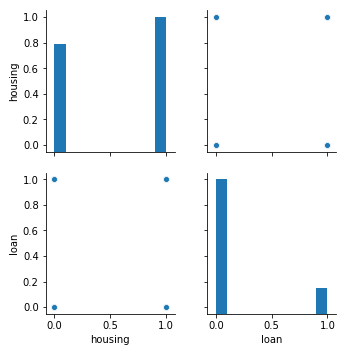

In [12]:
sns.pairplot(data[['job','housing','loan']])

In [26]:
for feature in data.columns: 
    if data[feature].dtype == 'object': 
        data[feature] = pd.Categorical(data[feature]).codes 

In [57]:
X=data.drop('Target',axis=1)
y=data['Target']

In [68]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' )

In [69]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.3, random_state = 4)


In [70]:
data.dropna(axis="columns")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,5,1.0,1.0,0,2143,1,0,0,5,8,261,1,-1,0,0,0
1,44,10,0.0,0.0,0,29,1,0,0,5,8,151,1,-1,0,0,0
2,33,3,1.0,0.0,0,2,1,1,0,5,8,76,1,-1,0,0,0
3,47,2,1.0,0.0,0,1506,1,0,0,5,8,92,1,-1,0,0,0
4,33,0,0.0,0.0,0,1,0,0,0,5,8,198,1,-1,0,0,0
5,35,5,1.0,1.0,0,231,1,0,0,5,8,139,1,-1,0,0,0
6,28,5,0.0,1.0,0,447,1,1,0,5,8,217,1,-1,0,0,0
7,42,3,0.0,1.0,1,2,1,0,0,5,8,380,1,-1,0,0,0
8,58,6,1.0,0.0,0,121,1,0,0,5,8,50,1,-1,0,0,0
9,43,10,0.0,0.0,0,593,1,0,0,5,8,55,1,-1,0,0,0


In [71]:
data.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
Target       False
dtype: bool

In [72]:
data.fillna(value=0 , inplace=True)

In [73]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,5,1.0,1.0,0,2143,1,0,0,5,8,261,1,-1,0,0,0
1,44,10,0.0,0.0,0,29,1,0,0,5,8,151,1,-1,0,0,0
2,33,3,1.0,0.0,0,2,1,1,0,5,8,76,1,-1,0,0,0
3,47,2,1.0,0.0,0,1506,1,0,0,5,8,92,1,-1,0,0,0
4,33,0,0.0,0.0,0,1,0,0,0,5,8,198,1,-1,0,0,0
5,35,5,1.0,1.0,0,231,1,0,0,5,8,139,1,-1,0,0,0
6,28,5,0.0,1.0,0,447,1,1,0,5,8,217,1,-1,0,0,0
7,42,3,0.0,1.0,1,2,1,0,0,5,8,380,1,-1,0,0,0
8,58,6,1.0,0.0,0,121,1,0,0,5,8,50,1,-1,0,0,0
9,43,10,0.0,0.0,0,593,1,0,0,5,8,55,1,-1,0,0,0


In [74]:
X_train = data.head(35000)
X_test = data.tail(10211)
train_labels = X_train.pop("default")
test_labels = X_test.pop("default")

In [75]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 6)
rfcl = rfcl.fit(X_train, train_labels)

In [76]:
test_pred = rfcl.predict(X_test)
rfcl.score(X_test , test_labels)

0.9931446479287044

In [77]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=50)
abcl = abcl.fit(X_train, train_labels)


In [78]:
test_pred=abcl.predict(X_test)
abcl.score(X_test , test_pred)

1.0

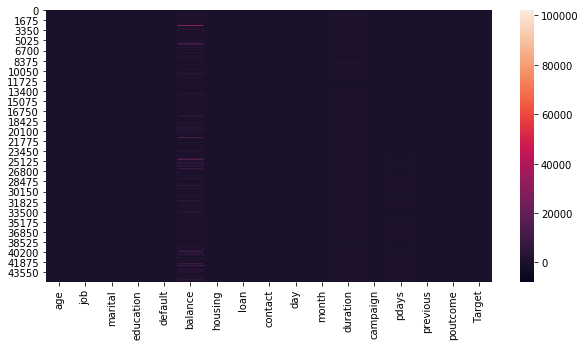

In [79]:
f=plt.figure(figsize=(10,5))
sns.heatmap(data)